# Linear Regression (Moore's Law)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [3]:
data = pd.read_csv('data/moore.csv').to_numpy()
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]
X = X - X.mean()
y = np.log(y)

Train on 161 samples
Epoch 1/100
161/161 [==============================] - 0s 2ms/sample - loss: 349.1424
Epoch 2/100
161/161 [==============================] - 0s 49us/sample - loss: 320.5623
Epoch 3/100
161/161 [==============================] - 0s 46us/sample - loss: 240.1893
Epoch 4/100
161/161 [==============================] - 0s 49us/sample - loss: 209.8448
Epoch 5/100
161/161 [==============================] - 0s 46us/sample - loss: 242.9940
Epoch 6/100
161/161 [==============================] - 0s 49us/sample - loss: 129.4923
Epoch 7/100
161/161 [==============================] - 0s 52us/sample - loss: 136.7724
Epoch 8/100
161/161 [==============================] - 0s 43us/sample - loss: 174.8624
Epoch 9/100
161/161 [==============================] - 0s 46us/sample - loss: 89.7418
Epoch 10/100
161/161 [==============================] - 0s 46us/sample - loss: 51.5190
Epoch 11/100
161/161 [==============================] - 0s 46us/sample - loss: 27.4637
Epoch 12/100
161/161 [==

161/161 [==============================] - 0s 59us/sample - loss: 0.8804
Epoch 96/100
161/161 [==============================] - 0s 46us/sample - loss: 0.8798
Epoch 97/100
161/161 [==============================] - 0s 46us/sample - loss: 0.8731
Epoch 98/100
161/161 [==============================] - 0s 46us/sample - loss: 0.8739
Epoch 99/100
161/161 [==============================] - 0s 46us/sample - loss: 0.8821
Epoch 100/100
161/161 [==============================] - 0s 46us/sample - loss: 0.8785


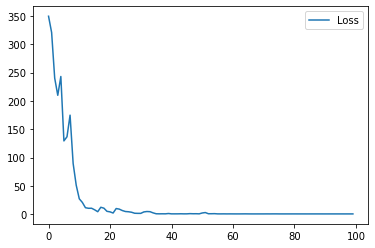

In [4]:
i = tf.keras.layers.Input(shape=(1,))
x = tf.keras.layers.Dense(1)(i)
model = tf.keras.models.Model(i, x)

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
              loss='mse')
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 0.001 if x < 50 else 0.0001)

r = model.fit(X, y,
              epochs=100,
              callbacks=[scheduler])

plt.plot(r.history.get('loss'), label='Loss')
plt.legend()
plt.show()

Time to double: 2.035797502833834


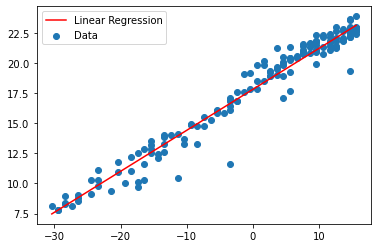

In [5]:
a = model.layers[1].get_weights()[0][0, 0]
print(f'Time to double: {np.log(2) / a}')

X_hat = np.linspace(X.min(), X.max(), 100)
y_hat = model.predict(X_hat.reshape(-1, 1))
plt.scatter(X.flatten(), y, label='Data')
plt.plot(X_hat, y_hat, color='red', label='Linear Regression')
plt.legend()
plt.show()